# Playing with Google Colab

In [1]:
print("I am learning Machine Learning!")

I am learning Machine Learning!


# Cloning Git Repo

In [2]:
!git clone https://github.com/PratishMashankar/yet-another-ml-recipe

Cloning into 'yet-another-ml-recipe'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 3 (delta 0), pack-reused 0
Receiving objects: 100% (3/3), 25.33 MiB | 18.78 MiB/s, done.


# Importing IMDb Dataset

In [11]:
#Imports for processing the data
import pandas as pd

df_imdb = pd.read_csv("/content/yet-another-ml-recipe/IMDB Dataset.csv")

print("Length of IMDB File:",len(df_imdb))
df_imdb.head()

Length of IMDB File: 50000


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# Visualizing the data

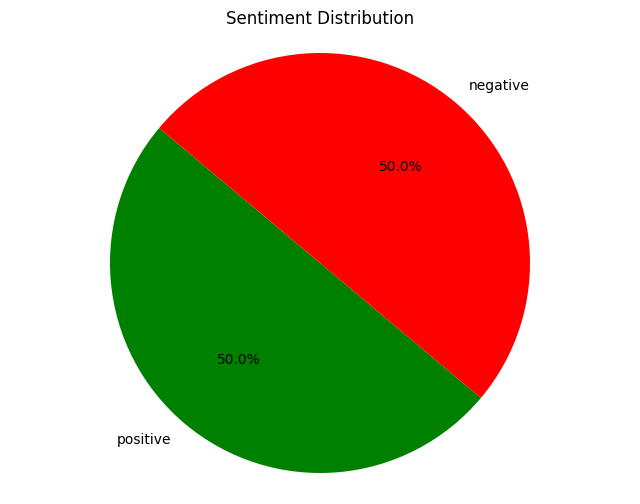

In [12]:
import matplotlib.pyplot as plt

# Counting the occurrences of each sentiment
sentiment_counts = df_imdb['sentiment'].value_counts()

# Creating the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['green', 'red'])
plt.title('Sentiment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Pre-processing the Train and Test dataframes' review column

## Imports for preprocessing

In [8]:
#imports and downloads
import re

#to remove html tags
from bs4 import BeautifulSoup

#to remove accented strings
!pip install unidecode
import unidecode

# Import stopwords with nltk.
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 2.2 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## Clean the data

In [13]:
#1. Convert all text to lower case
df_imdb['review'] = df_imdb['review'].str.lower()

#2. Removing html tags
df_imdb['review'] = df_imdb['review'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())

#3. Remove URLs, numbers and emails
def clean_text(text):
    text = re.sub(r'http\S+', '', text) # remove URLs
    text = re.sub(r'\d+', '', text) # remove numbers
    text = re.sub(r'\S+@\S+', '', text) # remove email addresses
    return text
df_imdb['review'] = df_imdb['review'].apply(lambda x: clean_text(x))

#4. Remove punctuation and numbers
df_imdb['review'] = df_imdb['review'].apply(lambda x: re.sub('[^a-zA-Z]', ' ', x))

#5. Removing stopwords with Python's list comprehension and pandas.DataFrame.apply
stop = stopwords.words('english')
df_imdb['review'] = df_imdb['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

#6. Remove accented strings
df_imdb['review'] = df_imdb['review'].apply(lambda x: unidecode.unidecode(x))

print("Cleaning of data completed!")
df_imdb.head()

<ipython-input-13-6c075273be72>:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  df_imdb['review'] = df_imdb['review'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())


Cleaning of data completed!


,review,sentiment
0,one reviewers mentioned watching oz episode ho...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically family little boy jake thinks zombie...,negative
4,petter mattei love time money visually stunnin...,positive


# Train Test Split

In [16]:
# split the dataset in train and test
from sklearn.model_selection import train_test_split

X = df_imdb['review']
y = df_imdb['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Vectorization
Perform vectorization using ngrams, bag of words and TFIDF vectorizer

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Define TFIDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Vectorize your X_train and X_test
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)

# Define and Train Logistic Regression model

## Training the model

In [20]:
from sklearn.linear_model import LogisticRegression

# Defining the Logistic Regression Model
logistic_regression = LogisticRegression(random_state=42)

# Training the logistic regression Model
logistic_regression.fit(train_vectors, y_train)

LogisticRegression(random_state=42)

## Testing the model

In [21]:
from sklearn.metrics import accuracy_score

# Predicting the test data
predictions = logistic_regression.predict(test_vectors)

# Calculating the accuracy
accuracy = accuracy_score(y_test, predictions) * 100
print(f"Accuracy of Logistic Regression: {accuracy}")

Accuracy of Logistic Regression: 89.39


# Define and Train a KNN model

## Training the model

In [22]:
from sklearn.neighbors import KNeighborsClassifier

# Defining the KNN Model
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors as needed

# Training the KNN Model
knn.fit(train_vectors, y_train)

KNeighborsClassifier()

## Testing the model

In [24]:
from sklearn.metrics import accuracy_score

# Predicting the test data
predictions = knn.predict(test_vectors)

# Calculating the accuracy
accuracy = accuracy_score(y_test, predictions) * 100
print(f"Accuracy of KNN: {accuracy}")

Accuracy of KNN: 73.94


# Compare accuracies

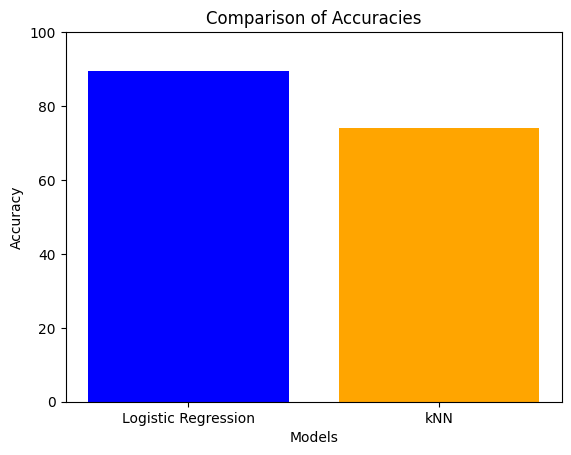

In [26]:
import matplotlib.pyplot as plt

def plot_accuracies(accuracy1, accuracy2, labels=('Logistic Regression', 'kNN')):
    # Bar positions
    x = range(len(labels))

    # Bar heights (accuracies)
    accuracies = [accuracy1, accuracy2]

    # Plotting the bar graph
    plt.bar(x, accuracies, color=['blue', 'orange'])

    # Adding labels and title
    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.title('Comparison of Accuracies')
    plt.xticks(x, labels)
    plt.ylim(0, 100)  # Assuming accuracies are between 0 and 1

    # Display the plot
    plt.show()

# Example usage:
accuracy_model1 = 89.39
accuracy_model2 = 73.94

plot_accuracies(accuracy_model1, accuracy_model2)

# Playing with the Model

In [37]:
# New sentence to classify
new_sentence = "i am excited for you to be happy"

# Preprocess new sentence and convert to TF-IDF feature vector
new_sentence_tfidf = vectorizer.transform([new_sentence])

# Use trained model to predict sentiment
prediction = logistic_regression.predict(new_sentence_tfidf)

# Get probability scores
probability_scores = logistic_regression.predict_proba(new_sentence_tfidf)

print("Predicted class:", prediction[0])
print("Probability scores:", probability_scores)

Predicted class: positive
Probability scores: [[0.48543247 0.51456753]]
